### Getting the dataset from kaggle
Dataset：Face Mask Detection

https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection  
I only use 2000 images of each class in the dataset ,which are the images numbered 1~2000 in each class of images.

I used 3000 images as the training dataset, including 1000 images of each class, and 1500 images as the validation dataset, including 500 images of each class. Finally, we use 1500 images as the test dataset.

I use google colab to run this code. Google colab is a free CPU virtual machine based on Jupyter Notebook. 

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from keras.applications import vgg16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
num_classs=3
image_size=128
batch_size_training=20
batch_size_validation=20
data_generator=ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
# training data
train_generator=data_generator.flow_from_directory(
   "/content/drive/My Drive/Colab Notebooks1/AI class/small_dataset/train" ,
   target_size=(image_size,image_size),
   batch_size=batch_size_training,
   class_mode="categorical"
)

# validation data
valid_generator=data_generator.flow_from_directory(
   "/content/drive/My Drive/Colab Notebooks1/AI class/small_dataset/validation" ,
   target_size=(image_size,image_size),
   batch_size=batch_size_validation,
   class_mode="categorical"
)

Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [ ]:
# VGG16 model architecture
model16 = VGG16(weights='imagenet',pooling='avg',include_top=False)
model16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Using transfer learing to bulid model

In [ ]:
model = Sequential()
#Only use VGG16 to extract features, so the last fully connected layer is not included
model.add(VGG16(weights='imagenet',pooling='avg',include_top=False,)) 
#Add a fully connected layer of 3 class
model.add(Dense(num_classs, activation='softmax')) 
#Freeze the features layer and only train the last fully connected layer
model.layers[0].trainable = False 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# model parameter
model.compile(optimizer='adam',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

steps_per_epoch_train=len(train_generator)
steps_per_epoch_val= len(valid_generator)
number_epochs=20

In [ ]:
#fit model
fit_history = model.fit_generator(train_generator,
                  steps_per_epoch=steps_per_epoch_train,
                  epochs = number_epochs,
                  validation_data = valid_generator,
                  validation_steps = steps_per_epoch_val,
                  verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
150/150 [==============================] - 933s 6s/step - loss: 1.2242 - accuracy: 0.7337 - val_loss: 0.2883 - val_accuracy: 0.9053
Epoch 2/20
150/150 [==============================] - 12s 77ms/step - loss: 0.2122 - accuracy: 0.9367 - val_loss: 0.1737 - val_accuracy: 0.9480
Epoch 3/20
150/150 [==============================] - 13s 89ms/step - loss: 0.1151 - accuracy: 0.9667 - val_loss: 0.1153 - val_accuracy: 0.9687
Epoch 4/20
150/150 [==============================] - 13s 90ms/step - loss: 0.0770 - accuracy: 0.9787 - val_loss: 0.0944 - val_accuracy: 0.9740
Epoch 5/20
150/150 [==============================] - 13s 85ms/step - loss: 0.0542 - accuracy: 0.9840 - val_loss: 0.0855 - val_accuracy: 0.9773
Epoch 6/20
150/150 [==============================] - 13s 87ms/step - loss: 0.0380 - accuracy: 0.9897 - val_loss: 0.0787 - val_accuracy: 0.9793
Epoch 7/20
150/150 [==============================] - 13s 86ms/step - loss: 0.0298 - accuracy: 0.9933 - val_loss: 0.0760 - val_accuracy: 

In [ ]:
model.save('/content/drive/MyDrive/VGG_model.h5') #saved trained model

In [ ]:
from keras.models import load_model

vgg16_saved = load_model('/content/drive/MyDrive/VGG_model.h5') #load trained model
vgg16_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Testing data
test_gen=data_generator.flow_from_directory(
   "/content/drive/My Drive/Colab Notebooks1/AI class/small_dataset/test" ,
   target_size=(image_size,image_size),
   shuffle=False
)
steps_per_epoch_test = len(test_gen)

Found 1500 images belonging to 3 classes.


### Evaluation

In [ ]:
#Accuracy of Testing data
test_history = vgg16_saved.evaluate_generator(test_gen,steps_per_epoch_test,verbose=1)
print('the accuracy for testing is ',test_history[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


47/47 [==============================] - 285s 6s/step - loss: 0.2981 - accuracy: 0.9673
the accuracy for testing is  0.9673333168029785


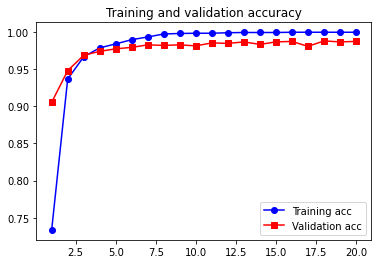

In [ ]:
#plot the accuracy 
import matplotlib.pyplot as plt

train_accuracy = fit_history.history['accuracy']
val_accuracy = fit_history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo-', label='Training acc')
plt.plot(epochs, val_accuracy, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

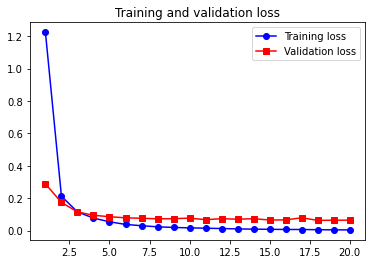

In [ ]:
#plot the loss 

train_loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']

plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predict = vgg16_saved.predict(test_gen).argmax(axis = 1) #predicted class
true_classes = test_gen.classes #true class
print('true classes=',true_classes)
print('predict classes=',predict)

class_labels = list(test_gen.class_indices.keys()) 
class_labels

true classes= [0 0 0 ... 2 2 2]
predict classes= [0 0 0 ... 2 2 2]


['incorrect', 'with_mask', 'without_mask']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[499   4   4]
 [ 25 466   6]
 [  2   8 486]]


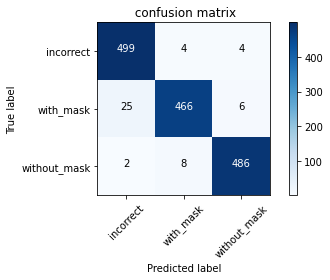

In [ ]:
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

cnf_matrix = confusion_matrix(true_classes, predict) #confusion_matrix
plot_confusion_matrix(cnf_matrix, classes=class_labels,normalize=False,title=' confusion matrix')
plt.show()

### Prediction

In [ ]:
test_gen_1=data_generator.flow_from_directory(
   "/content/drive/My Drive/Colab Notebooks1/AI class/test11" ,
   target_size=(image_size,image_size),
   shuffle=False)

steps_per_epoch_test= len(test_gen_1)
predict = vgg16_saved.predict_generator(test_gen_1) #model predict

Found 8 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


### Label the model predictions on the picture

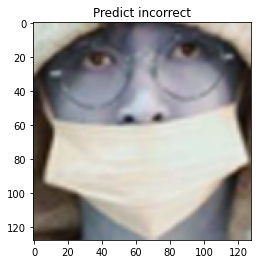

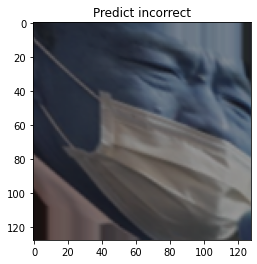

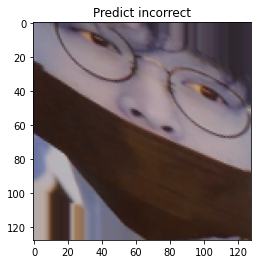

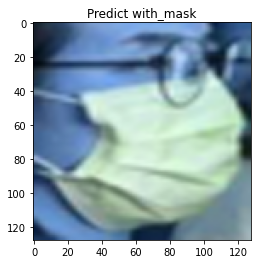

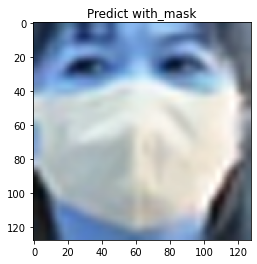

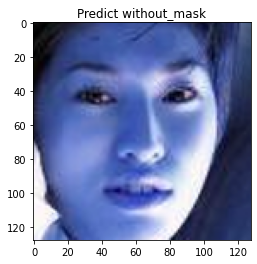

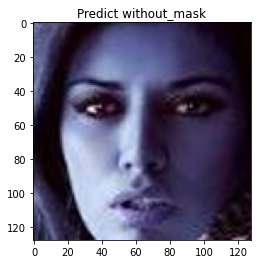

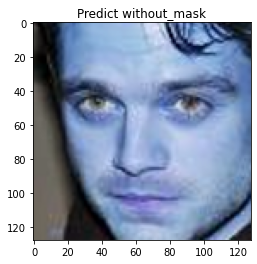

In [ ]:
from imutils import paths
import cv2
import numpy as np 

path='/content/drive/My Drive/Colab Notebooks1/AI class/test11' 
imagePaths = sorted(list(paths.list_images(path))) #sort the files in the folder

i=0
for imagePath in imagePaths: # Read each file in the folder sequentially
    image_ori = cv2.imread(imagePath)
    plt.imshow(image_ori) #show each image
    r = np.argmax(predict[i]) #The prediction result is 0, 1, 2, and the one with the highest probability is selected
    label=['incorrect','with_mask','without_mask']
    plt.title('Predict '+ label[r]) #Add label to each image title
    i+=1
    plt.show()